# Practical 7: Clustering

### Prepared by: <a href="https://www.linkedin.com/in/a-kanaan/">Dr Abdulkarim M. Jamal Kanaan</a>
<hr>

* Acknowledgements: I would like to acknowledge the book "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" written by Aurélien Géron. This practical exercise was heavily influenced by Chapter 9 of the book, titled "Unserupervised Learning."

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/a-kanaan/dm-practicals/blob/main/practical7/practical7_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = "6"

## Classification vs Clustering

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

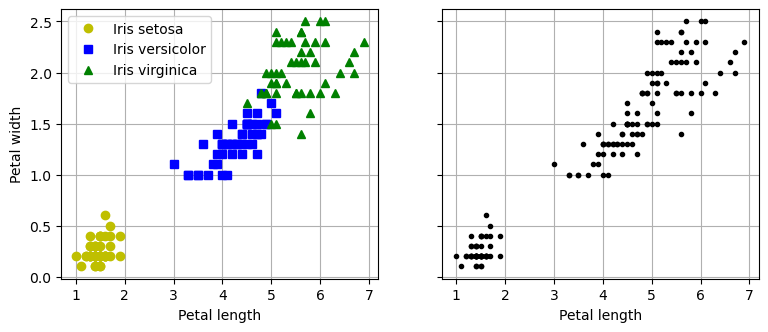

In [ ]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

## K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

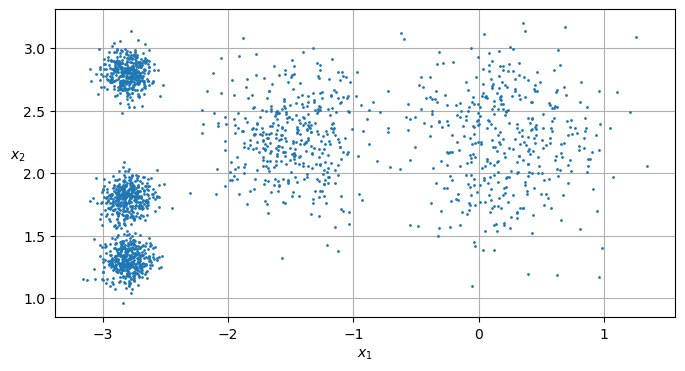

In [ ]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)
y_pred

array([4, 0, 1, ..., 2, 1, 0])

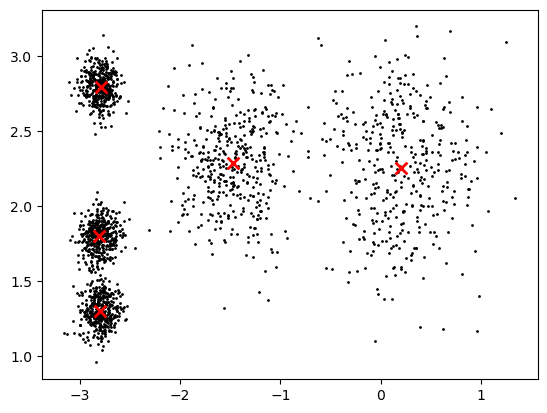

In [ ]:
centroids= kmeans.cluster_centers_

plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=2, linewidths=12,
            color='r', zorder=11, alpha=1)

In [ ]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [ ]:
import numpy as np

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

## **Hard Clustering _vs_ Soft Clustering**

In [ ]:
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

## Performance Measures

### Intertia
Inertia, also known as within-cluster sum of squares, is a measure of how internally coherent the clusters are. It calculates the total distance between each sample in a cluster and the centroid of that cluster. The objective is usually to minimize inertia, as a lower inertia value indicates that the points within each cluster are closer to each other, and thus the clusters are more compact.

<img src="attachment:c768a071-c19d-44f2-af76-fcb1fc0e3d70.png" style="width: 250px" />
(ref: https://medium.com/analytics-vidhya/k-means-clustering-3ce2456db7f1)
|
<img src="attachment:442c7182-563b-4b68-9b94-2f133a86f263.png" style="width:350px"/>
(ref: https://towardsdatascience.com/explain-ml-in-a-simple-way-k-means-clustering-e925d019743b)

In [ ]:
kmeans.inertia_

211.59853725816836

In [ ]:
X_dist = kmeans.transform(X)
(X_dist[np.arange(len(X_dist)), kmeans.labels_] ** 2).sum()

211.59853725816856

In [ ]:
kmeans.score(X)

-211.59853725816836

### Finding Optimal Value of K

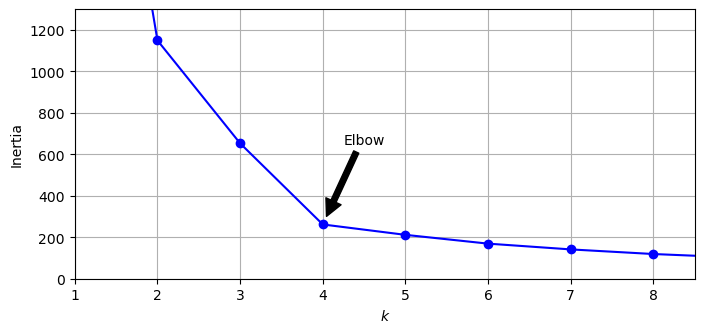

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

### Silhouette Score
The Silhouette Score is computed for each data point, and is given by the formula:

![image.png](attachment:9b008147-e33f-4f08-8bca-b22ea171e03c.png)

<img src="attachment:ec64bb10-865e-41e9-8494-d248de6ea501.png" style="background:white; width:250px" />

- a(i) is the average distance from the i-th data point to the other data points in the same cluster.
- b(i) is the smallest average distance from the i-th data point to data points in a different cluster, minimized over clusters.

The Silhouette Score ranges from -1 to 1, where:
- A positive value close to +1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate.
- A value near 0 means that the data point is on or very close to the decision boundary between two neighboring clusters.
- A negative value close to -1 indicates that the data point might be assigned to the wrong cluster.



In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

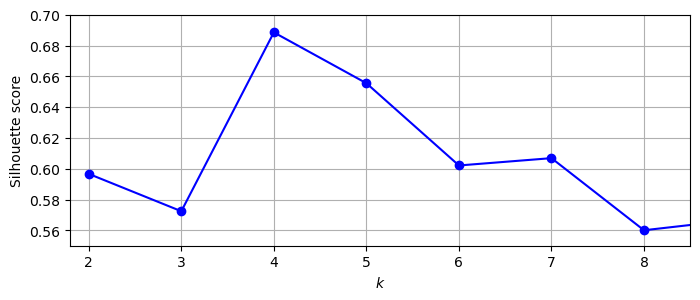

In [ ]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()

plt.show()

## DBSCAN

<img src="attachment:c3081bce-b35e-4886-bc1c-195bf3e8ae9d.png" style="width:350px" />

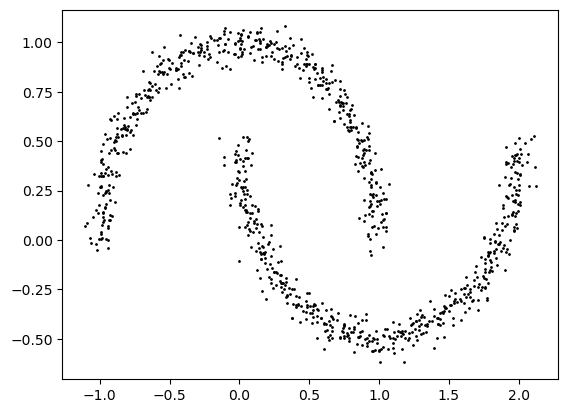

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

In [ ]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [ ]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [ ]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

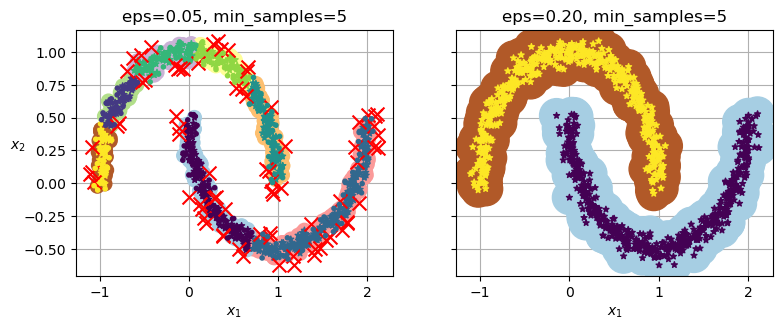

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

## Hierarchical Clustering
### Agglomerative Clustering

<img src="attachment:8b6b1263-3f7e-498e-a5de-fcfc66078c31.png" style="width:550px" />


![AggloUrl](https://cdn-images-1.medium.com/max/640/1*ET8kCcPpr893vNZFs8j4xg.gif "Agglomerative")
(ref: https://primo.ai/index.php?title=Hierarchical_Clustering;_Agglomerative_%28HAC%29_%26_Divisive_%28HDC%29)

Recursively merges pair of clusters of sample data; uses linkage distance.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

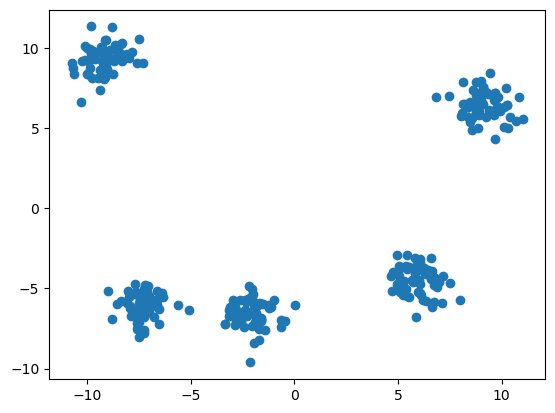

In [ ]:
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=.8)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
#n_clusters=5, linkage="complete"
'''
metric : str or callable, default=None
    Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
    "manhattan", "cosine", or "precomputed". If set to `None` then
    "euclidean" is used. If linkage is "ward", only "euclidean" is
    accepted. If "precomputed", a distance matrix is needed as input for
    the fit method.
linkage : {'ward', 'complete', 'average', 'single'}, default='ward'
    Which linkage criterion to use. The linkage criterion determines which
    distance to use between sets of observation. The algorithm will merge
    the pairs of cluster that minimize this criterion.
'''
agg = AgglomerativeClustering(linkage="complete").fit(X)
agg

AgglomerativeClustering(linkage='complete')

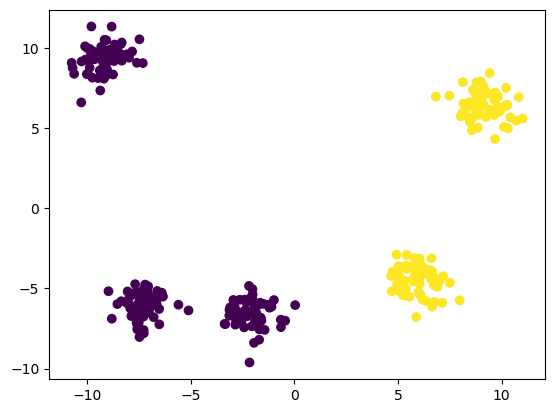

In [ ]:
plt.scatter(X[:,0], X[:,1], c=agg.labels_)
plt.show()